In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc
import numpy as np
import matplotlib.pyplot as plt


In [ ]:

data = pd.read_csv('/content/drive/My Drive/2022/news.csv')
data = data.set_index("Unnamed: 0")
data.head()

,title,text,label
Unnamed: 0,,,
8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [ ]:

data.shape

(6335, 3)

In [ ]:
data.isnull().sum()

title    0
text     0
label    0
dtype: int64

In [ ]:
data.duplicated()

Unnamed: 0
8476     False
10294    False
3608     False
10142    False
875      False
         ...  
4490     False
8062     False
8622     False
4021     False
4330     False
Length: 6335, dtype: bool

In [ ]:

y = data.copy()

In [ ]:
y.drop("label",axis=1)
y.head()

,title,text,label
Unnamed: 0,,,
8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [ ]:

y['text'] = y['text'].apply(lambda x: ''.join([" " if ord(i) < 32 or (ord(i) > 32 and ord(i) < 65) or (ord(i) > 90 and ord(i) < 97) or ord(i) > 122 else i for i in x]))
y['title'] = y['title'].apply(lambda x: ''.join([" " if ord(i) < 32 or (ord(i) > 32 and ord(i) < 65) or (ord(i) > 90 and ord(i) < 97) or ord(i) > 122 else i for i in x]))

#filter out numbers and special characters

In [ ]:

y['text'] = y['text'].str.lower()
y['title'] = y['title'].str.lower()
y['label'] = y['label'].str.lower()
y.head(8)

,title,text,label
Unnamed: 0,,,
8476,you can smell hillary s fear,daniel greenfield a shillman journalism fello...,fake
10294,watch the exact moment paul ryan committed pol...,google pinterest digg linkedin reddit stumbleu...,fake
3608,kerry to go to paris in gesture of sympathy,u s secretary of state john f kerry said mon...,real
10142,bernie supporters on twitter erupt in anger ag...,kaydee king kaydeeking november t...,fake
875,the battle of new york why this primary matters,it s primary day in new york and front runners...,real
6903,tehran usa,i m not an immigrant but my grandparents a...,fake
7341,girl horrified at what she watches boyfriend d...,share this baylee luciani left screenshot o...,fake
95,britain s schindler dies at,a czech stockbroker who saved more than je...,real


In [ ]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords') # You may need to run this first
stop_array = (stopwords.words('english'))
#set(stopwords.words('english'))

# Remove stop words
y['text'] = y['text'].apply(lambda row: ' '.join([" " if word in stop_array else word for word in row.split()]))
y['title'] = y['title'].apply(lambda row: ' '.join([" " if word in stop_array else word for word in row.split()]))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
# Delete all non-English words. This is a problem because it also deletes names not in the corpus
# Could keep as an option to see if it increases accuracy
from nltk.corpus import words
nltk.download('words')

opt = y.copy()
words = set(words.words())
opt['text'] = opt['text'].apply(lambda row: ' '.join([" " if w not in words else w for w in row.split()]))
opt['title'] = opt['title'].apply(lambda row: ' '.join([" " if w not in words else w for w in row.split()]))
opt.head()

[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


,title,text,label
Unnamed: 0,,,
8476,smell fear,journalism fellow freedom center new yor...,fake
10294,watch exact moment political suicide tru...,print delicious pocket two funda...,fake
3608,kerry go gesture sympathy,u secretary state f kerry said stop late...,real
10142,twitter erupt anger tried warn,king lesson tonight time start lis...,fake
875,battle new york primary,primary day new york front trump leadi...,real


In [ ]:
opt.head()
# TODO: Might need to lemmatize words before vectorizing them

,title,text,label
Unnamed: 0,,,
8476,smell fear,journalism fellow freedom center new yor...,fake
10294,watch exact moment political suicide tru...,print delicious pocket two funda...,fake
3608,kerry go gesture sympathy,u secretary state f kerry said stop late...,real
10142,twitter erupt anger tried warn,king lesson tonight time start lis...,fake
875,battle new york primary,primary day new york front trump leadi...,real


In [ ]:
y2 = y.copy()
# With text
X_train, X_test, y_train, y_test = train_test_split(y['text'], y2, test_size=0.33, random_state=53)

# With headlines
X_train2, X_test2, y_train2, y_test2 = train_test_split(y['title'], y2, test_size=0.33, random_state=53)

In [ ]:
# Use tf-idf and count vectorizer to find most relevant words in corpus
# TfidfVectorizer should remove stop words and words that appear in more than 70% of the articles

# Vectorizers have an ngram range! Check if bigrams will improve accuracy
from sklearn.feature_extraction.text import CountVectorizer
count_vectorizer = CountVectorizer(stop_words='english') # already gets rid of stop words
count_train = count_vectorizer.fit_transform(X_train) 
count_test = count_vectorizer.transform(X_test)

from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7) 
tfidf_train = tfidf_vectorizer.fit_transform(X_train)  
tfidf_test = tfidf_vectorizer.transform(X_test)

In [ ]:

tfidf_vectorizer_bi = TfidfVectorizer(stop_words='english', max_df=0.7, ngram_range=(1,2)) 
tfidf_train_bi = tfidf_vectorizer_bi.fit_transform(X_train)  
tfidf_test_bi = tfidf_vectorizer_bi.transform(X_test)

In [ ]:
print(tfidf_vectorizer.get_feature_names()[-10:])
print(count_vectorizer.get_feature_names()[:10])

['zweiter', 'zwick', 'zwicker', 'zwischenmenschlicher', 'zwvgl', 'zxua', 'zxycmwjdxj', 'zybvwqhlbctginctv', 'zyzs', 'zz']
['aa', 'aaa', 'aaas', 'aab', 'aadmi', 'aaeeb', 'aahing', 'aaib', 'aaingr', 'aalia']


In [ ]:
count_df = pd.DataFrame(count_train.A, columns=count_vectorizer.get_feature_names())
count_df.head()

,aa,aaa,aaas,aab,aadmi,aaeeb,aahing,aaib,aaingr,aalia,aaluijqn,aam,aamaq,aamon,aaojejptcy,aap,aarhus,aaron,aaronapollocamp,aarondmiller,aaronson,aarp,aart,aau,aauw,aaza,ab,aba,abaaoud,ababa,aback,abad,abadi,abandon,abandoned,abandoning,abandonment,abandonnig,abandons,abate,...,zsl,zsrbhgh,zttya,ztv,zu,zubeidat,zucchini,zuccotti,zucker,zuckerberg,zucman,zuesse,zukowski,zulema,zulfiqar,zulia,zulu,zulus,zuma,zuniga,zupwadekboalpdzmu,zurich,zuroff,zuylen,zvcmjsxbppcyrffw,zvezda,zvulun,zvz,zw,zwanzig,zweiter,zwick,zwicker,zwischenmenschlicher,zwvgl,zxua,zxycmwjdxj,zybvwqhlbctginctv,zyzs,zz
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
count_df.describe()

,aa,aaa,aaas,aab,aadmi,aaeeb,aahing,aaib,aaingr,aalia,aaluijqn,aam,aamaq,aamon,aaojejptcy,aap,aarhus,aaron,aaronapollocamp,aarondmiller,aaronson,aarp,aart,aau,aauw,aaza,ab,aba,abaaoud,ababa,aback,abad,abadi,abandon,abandoned,abandoning,abandonment,abandonnig,abandons,abate,...,zsl,zsrbhgh,zttya,ztv,zu,zubeidat,zucchini,zuccotti,zucker,zuckerberg,zucman,zuesse,zukowski,zulema,zulfiqar,zulia,zulu,zulus,zuma,zuniga,zupwadekboalpdzmu,zurich,zuroff,zuylen,zvcmjsxbppcyrffw,zvezda,zvulun,zvz,zw,zwanzig,zweiter,zwick,zwicker,zwischenmenschlicher,zwvgl,zxua,zxycmwjdxj,zybvwqhlbctginctv,zyzs,zz
count,4244.000000,4244.000000,4244.000000,4244.000000,4244.000000,4244.000000,4244.000000,4244.000000,4244.000000,4244.000000,4244.000000,4244.000000,4244.000000,4244.000000,4244.000000,4244.000000,4244.000000,4244.000000,4244.000000,4244.000000,4244.000000,4244.000000,4244.000000,4244.000000,4244.000000,4244.000000,4244.000000,4244.000000,4244.000000,4244.000000,4244.000000,4244.000000,4244.000000,4244.000000,4244.000000,4244.000000,4244.000000,4244.000000,4244.000000,4244.000000,...,4244.000000,4244.000000,4244.000000,4244.000000,4244.000000,4244.000000,4244.000000,4244.000000,4244.000000,4244.000000,4244.000000,4244.000000,4244.000000,4244.000000,4244.000000,4244.000000,4244.000000,4244.000000,4244.000000,4244.000000,4244.000000,4244.000000,4244.000000,4244.000000,4244.000000,4244.000000,4244.000000,4244.000000,4244.000000,4244.000000,4244.000000,4244.000000,4244.000000,4244.000000,4244.000000,4244.000000,4244.000000,4244.000000,4244.000000,4244.000000
mean,0.002828,0.000707,0.000236,0.002121,0.000236,0.001178,0.000236,0.000236,0.000236,0.000236,0.000236,0.000707,0.000471,0.000236,0.000236,0.001414,0.000236,0.006598,0.000236,0.000236,0.000943,0.000471,0.000236,0.000236,0.000707,0.000236,0.000471,0.000943,0.009661,0.000707,0.001649,0.000236,0.005655,0.013431,0.018850,0.008954,0.002121,0.000236,0.003063,0.000236,...,0.000707,0.000236,0.000236,0.000236,0.000471,0.000707,0.000236,0.000471,0.001414,0.006362,0.000236,0.003534,0.001414,0.000236,0.000236,0.000236,0.013666,0.006126,0.000236,0.000236,0.000236,0.000707,0.000236,0.000236,0.000236,0.000471,0.000236,0.000236,0.000236,0.000236,0.000236,0.001414,0.000236,0.000236,0.000236,0.000236,0.000236,0.000236,0.000236,0.000236
std,0.086798,0.026581,0.015350,0.109614,0.015350,0.076751,0.015350,0.015350,0.015350,0.015350,0.015350,0.034321,0.021706,0.015350,0.015350,0.068641,0.015350,0.118732,0.015350,0.015350,0.061401,0.021706,0.015350,0.015350,0.046050,0.015350,0.021706,0.037593,0.290717,0.026581,0.040584,0.015350,0.133716,0.126813,0.149232,0.101439,0.046007,0.015350,0.055267,0.015350,...,0.046050,0.015350,0.015350,0.015350,0.021706,0.046050,0.015350,0.030700,0.048527,0.131013,0.015350,0.070263,0.068641,0.015350,0.015350,0.015350,0.860149,0.399104,0.015350,0.015350,0.015350,0.034321,0.015350,0.015350,0.015350,0.021706,0.015350,0.015350,0.015350,0.015350,0.015350,0.057424,0.015350,0.015350,0.015350,0.015350,0.015350,0.015350,0.015350,0.015350
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000

In [ ]:
tfidf_df = pd.DataFrame(tfidf_train.A, columns=tfidf_vectorizer.get_feature_names())
tfidf_df.describe()

,aa,aaa,aaas,aab,aadmi,aaeeb,aahing,aaib,aaingr,aalia,aaluijqn,aam,aamaq,aamon,aaojejptcy,aap,aarhus,aaron,aaronapollocamp,aarondmiller,aaronson,aarp,aart,aau,aauw,aaza,ab,aba,abaaoud,ababa,aback,abad,abadi,abandon,abandoned,abandoning,abandonment,abandonnig,abandons,abate,...,zsl,zsrbhgh,zttya,ztv,zu,zubeidat,zucchini,zuccotti,zucker,zuckerberg,zucman,zuesse,zukowski,zulema,zulfiqar,zulia,zulu,zulus,zuma,zuniga,zupwadekboalpdzmu,zurich,zuroff,zuylen,zvcmjsxbppcyrffw,zvezda,zvulun,zvz,zw,zwanzig,zweiter,zwick,zwicker,zwischenmenschlicher,zwvgl,zxua,zxycmwjdxj,zybvwqhlbctginctv,zyzs,zz
count,4244.000000,4244.000000,4244.000000,4244.000000,4244.000000,4244.000000,4244.000000,4244.000000,4244.000000,4244.000000,4244.000000,4244.000000,4244.000000,4244.000000,4244.000000,4244.000000,4244.000000,4244.000000,4244.000000,4244.000000,4244.000000,4244.000000,4244.000000,4244.000000,4244.000000,4244.000000,4244.000000,4244.000000,4244.000000,4244.000000,4244.000000,4244.000000,4244.000000,4244.000000,4244.000000,4244.000000,4244.000000,4244.000000,4244.000000,4244.000000,...,4244.000000,4244.000000,4244.000000,4244.000000,4244.000000,4244.000000,4244.000000,4244.000000,4244.000000,4244.000000,4244.000000,4244.000000,4244.000000,4244.000000,4244.000000,4244.000000,4244.000000,4244.000000,4244.000000,4244.000000,4244.000000,4244.000000,4244.000000,4244.000000,4244.000000,4244.000000,4244.000000,4244.000000,4244.000000,4244.000000,4244.000000,4244.000000,4244.000000,4244.000000,4244.000000,4244.000000,4244.000000,4244.000000,4244.000000,4244.000000
mean,0.000141,0.000033,0.000005,0.000128,0.000015,0.000021,0.000011,0.000013,0.000009,0.000016,0.000009,0.000018,0.000027,0.000017,0.000009,0.000088,0.000022,0.000246,0.000025,0.000012,0.000033,0.000022,0.000016,0.000004,0.000039,0.000010,0.000020,0.000021,0.000450,0.000032,0.000067,0.000009,0.000239,0.000471,0.000591,0.000293,0.000106,0.000017,0.000071,0.000002,...,0.000034,0.000009,0.000009,0.000022,0.000015,0.000107,0.000029,0.000010,0.000155,0.000305,0.000024,0.000176,0.000056,0.000016,0.000005,0.000057,0.000133,0.000061,0.000010,0.000005,0.000009,0.000080,0.000016,0.000020,0.000009,0.000031,0.000013,0.000030,0.000009,0.000006,0.000010,0.000046,0.000006,0.000010,0.000009,0.000009,0.000014,0.000009,0.000009,0.000009
std,0.003542,0.001356,0.000295,0.005607,0.000966,0.001377,0.000726,0.000854,0.000556,0.001073,0.000556,0.000954,0.001266,0.001079,0.000556,0.004218,0.001434,0.004326,0.001626,0.000803,0.002126,0.001077,0.001060,0.000285,0.002520,0.000635,0.001220,0.000848,0.013513,0.001220,0.001741,0.000590,0.005641,0.004869,0.005156,0.003598,0.002547,0.001102,0.001510,0.000131,...,0.002224,0.000556,0.000556,0.001459,0.000699,0.006960,0.001862,0.000635,0.006577,0.005794,0.001542,0.004569,0.002585,0.001040,0.000316,0.003740,0.008179,0.003975,0.000654,0.000296,0.000556,0.003781,0.001057,0.001319,0.000556,0.001494,0.000838,0.001953,0.000556,0.000412,0.000674,0.002005,0.000367,0.000674,0.000556,0.000556,0.000938,0.000556,0.000587,0.000556
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000

In [ ]:
print(count_df.equals(tfidf_df)) # check if the vectorizers extracted different tokens

False


In [ ]:

from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
# MultinomialNB
multi_nb = MultinomialNB()
np.shape(tfidf_train)
np.shape(y_train)
multi_nb.fit(tfidf_train, y_train['label'])
pred = multi_nb.predict(tfidf_test)
score = accuracy_score(y_test['label'], pred)
print("accuracy:   %0.3f" % score) 

accuracy:   0.859


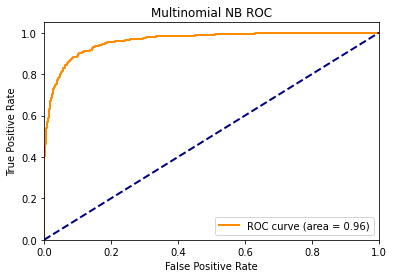

In [ ]:
y_score = multi_nb.predict_proba(tfidf_test)

fpr, tpr, _ = roc_curve(y_test['label'], y_score[:,1], pos_label='real')
roc_auc = auc(fpr, tpr)

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multinomial NB ROC')
plt.legend(loc="lower right")
plt.show()

In [ ]:
# Use a confusion matrix to compare accuracy
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test['label'], pred, labels=['fake', 'real'])

In [ ]:

import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    See full source and example: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization


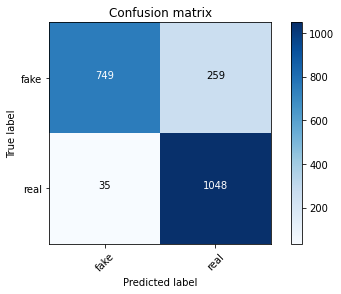

In [ ]:
plot_confusion_matrix(cm, classes=['fake', 'real'])
plt.show()

In [ ]:
count_multi_nb = MultinomialNB()
count_multi_nb.fit(count_train,y_train['label'])
c_pred = count_multi_nb.predict(count_test)
c_score = accuracy_score(y_test['label'],pred)
print("accuracy:   %0.3f" % c_score)

accuracy:   0.859


accuracy:   0.937
Confusion matrix, without normalization


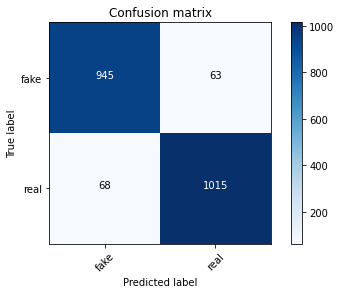

In [ ]:
from sklearn.linear_model import PassiveAggressiveClassifier
linear_clf = PassiveAggressiveClassifier()
linear_clf.fit(tfidf_train_bi, y_train['label'])
pred = linear_clf.predict(tfidf_test_bi)
linear_score = accuracy_score(y_test['label'], pred)
print("accuracy:   %0.3f" % linear_score)
linear_cm = confusion_matrix(y_test['label'], pred, labels=['fake', 'real'])
plot_confusion_matrix(linear_cm, classes=['fake', 'real'])
plt.show()

accuracy:   0.939
Confusion matrix, without normalization


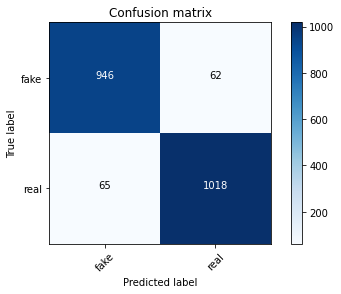

In [ ]:
from sklearn.linear_model import PassiveAggressiveClassifier
linear_clf = PassiveAggressiveClassifier()
linear_clf.fit(tfidf_train_bi, y_train['label'])
pred = linear_clf.predict(tfidf_test_bi)
linear_score = accuracy_score(y_test['label'], pred)
print("accuracy:   %0.3f" % linear_score)
linear_cm = confusion_matrix(y_test['label'], pred, labels=['fake', 'real'])
plot_confusion_matrix(linear_cm, classes=['fake', 'real'])
plt.show()

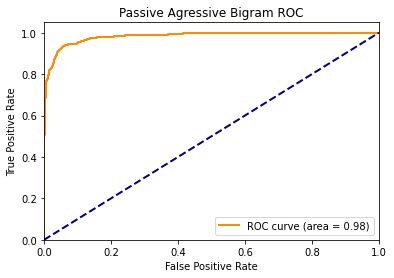

In [ ]:
y_score = linear_clf.decision_function(tfidf_test_bi)

fpr, tpr, _ = roc_curve(y_test['label'], y_score, pos_label='real')
roc_auc = auc(fpr, tpr)

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Passive Agressive Bigram ROC')
plt.legend(loc="lower right")
plt.show()

In [ ]:
clf = MultinomialNB(alpha=0.1)
last_score = 0
for alpha in np.arange(0,1,.1):
    nb_classifier = MultinomialNB(alpha=alpha)
    nb_classifier.fit(tfidf_train, y_train['label'])
    pred = nb_classifier.predict(tfidf_test)
    score = accuracy_score(y_test['label'], pred)
    if score > last_score:
        clf = nb_classifier
    print("Alpha: {:.2f} Score: {:.5f}".format(alpha, score))

/usr/local/lib/python3.6/dist-packages/sklearn/naive_bayes.py:507: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)


Alpha: 0.00 Score: 0.87661
Alpha: 0.10 Score: 0.89718
Alpha: 0.20 Score: 0.89240
Alpha: 0.30 Score: 0.88905
Alpha: 0.40 Score: 0.88666
Alpha: 0.50 Score: 0.88140
Alpha: 0.60 Score: 0.87709
Alpha: 0.70 Score: 0.87040
Alpha: 0.80 Score: 0.86514
Alpha: 0.90 Score: 0.86131


In [ ]:

def most_informative(vectorizer, classifier, n=100):
    class_labels = classifier.classes_
    feature_names = vectorizer.get_feature_names()
    topn_class1 = sorted(zip(classifier.coef_[0], feature_names))[:n]
    topn_class2 = sorted(zip(classifier.coef_[0], feature_names))[-n:]
    for coef,feat in topn_class1:
        print(class_labels[0],coef,feat)    
    print()
    for coef,feat in reversed(topn_class2):
        print(class_labels[1],coef,feat)

In [ ]:
most_informative(tfidf_vectorizer,linear_clf,n=30)

fake -1.4365591757589282 gena
fake -0.8908723556096457 mislabeling
fake -0.7268500406006688 hobby
fake -0.6814095692954207 jebbush
fake -0.6812435656488104 mortgages
fake -0.6768308181876677 qaddafi
fake -0.6267539692713604 dankof
fake -0.6210408180521114 scooped
fake -0.6098514533534302 advent
fake -0.5594320482078918 remembrance
fake -0.505331886579036 planes
fake -0.5015924511869011 ashkenazy
fake -0.4882045509825973 bolder
fake -0.4867838181203738 cortege
fake -0.48424074666177086 programming
fake -0.4828081319712832 disrespecting
fake -0.4748835662665521 gossipers
fake -0.47303606177319396 solver
fake -0.45464098008018744 papua
fake -0.45243763363383394 memetic
fake -0.44493567767362563 denigration
fake -0.4425742516504669 uphold
fake -0.4308087048082295 stoic
fake -0.4301173931248076 gentlemen
fake -0.4283569063398213 betterment
fake -0.4224910894717912 mailing
fake -0.41867428261867523 calabasas
fake -0.40172893835601464 fiving
fake -0.3997238623412043 parkinsons
fake -0.3898055

In [ ]:
# Most real
feature_names = tfidf_vectorizer.get_feature_names()
sorted(zip(clf.coef_[0], feature_names), reverse=True)[:20] # zip coefficients and sort them

[(-6.217829630710521, 'trump'),
 (-6.456655526108935, 'said'),
 (-6.6130755955398675, 'clinton'),
 (-7.000155002312522, 'obama'),
 (-7.106517990098555, 'sanders'),
 (-7.174732553936943, 'president'),
 (-7.229376134911667, 'campaign'),
 (-7.247530955461163, 'republican'),
 (-7.302173890576507, 'state'),
 (-7.303285890381561, 'cruz'),
 (-7.338998469390379, 'party'),
 (-7.406591947405525, 'new'),
 (-7.437086945717752, 'people'),
 (-7.496550052461004, 'percent'),
 (-7.515244735335175, 'bush'),
 (-7.539405668232934, 'republicans'),
 (-7.545348625818594, 'house'),
 (-7.591834612522435, 'voters'),
 (-7.60908197321694, 'rubio'),
 (-7.634394742602616, 'states')]

In [ ]:
# Most fake
sorted(zip(clf.coef_[0], feature_names))[:20]

[(-11.320426046643918, 'aa'),
 (-11.320426046643918, 'aaas'),
 (-11.320426046643918, 'aab'),
 (-11.320426046643918, 'aadmi'),
 (-11.320426046643918, 'aaeeb'),
 (-11.320426046643918, 'aaib'),
 (-11.320426046643918, 'aaingr'),
 (-11.320426046643918, 'aaluijqn'),
 (-11.320426046643918, 'aam'),
 (-11.320426046643918, 'aamon'),
 (-11.320426046643918, 'aaojejptcy'),
 (-11.320426046643918, 'aap'),
 (-11.320426046643918, 'aau'),
 (-11.320426046643918, 'ab'),
 (-11.320426046643918, 'aba'),
 (-11.320426046643918, 'abandonnig'),
 (-11.320426046643918, 'abate'),
 (-11.320426046643918, 'abay'),
 (-11.320426046643918, 'abbar'),
 (-11.320426046643918, 'abbot')]

In [ ]:

tokens_with_weights = sorted(list(zip(feature_names, clf.coef_[0])))

accuracy:   0.911
Confusion matrix, without normalization


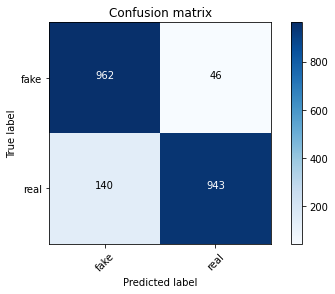

In [ ]:

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
logistic_clf = LogisticRegression()
logistic_clf.fit(tfidf_train, y_train['label'])
pred = logistic_clf.predict(tfidf_test)
logistic_score = accuracy_score(y_test['label'], pred)
print("accuracy:   %0.3f" % logistic_score)
logistic_cm = confusion_matrix(y_test['label'], pred, labels=['fake', 'real'])
plot_confusion_matrix(logistic_cm, classes=['fake', 'real'])
plt.show()

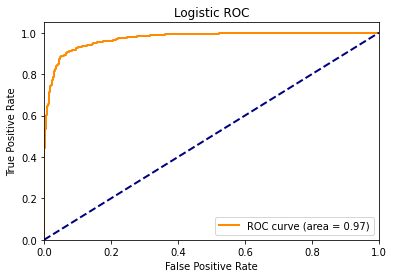

In [ ]:
y_score = logistic_clf.decision_function(tfidf_test)

fpr, tpr, _ = roc_curve(y_test['label'], y_score, pos_label='real')
roc_auc = auc(fpr, tpr)

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic ROC')
plt.legend(loc="lower right")
plt.show()

accuracy:   0.549
Confusion matrix, without normalization


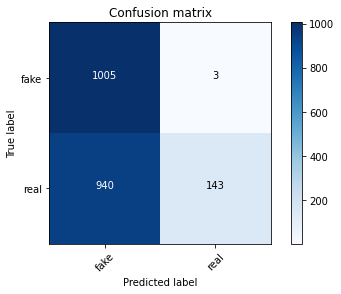

In [ ]:

from sklearn.neighbors import KNeighborsClassifier
knn_clf = KNeighborsClassifier()
knn_clf.fit(tfidf_train, y_train['label'])
pred = knn_clf.predict(tfidf_test)
knn_score = accuracy_score(y_test['label'], pred)
print("accuracy:   %0.3f" % knn_score)
knn_cm = confusion_matrix(y_test['label'], pred, labels=['fake', 'real'])
plot_confusion_matrix(knn_cm, classes=['fake', 'real'])
plt.show()

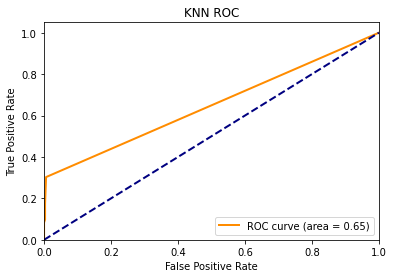

In [ ]:

y_score = knn_clf.predict_proba(tfidf_test)

fpr, tpr, _ = roc_curve(y_test['label'], y_score[:,1], pos_label='real')
roc_auc = auc(fpr, tpr)

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('KNN ROC')
plt.legend(loc="lower right")
plt.show()

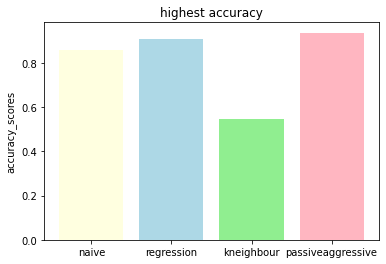

In [ ]:
models=['naive','regression','kneighbour','passiveaggressive']
accuracy_scores=[0.859,0.911,0.549,0.938]
plt.bar(models,accuracy_scores,color=['lightyellow','lightblue','lightgreen','lightpink'])
plt.ylabel("accuracy_scores")
plt.title("highest accuracy")
plt.show()